# Computer Vision Project

### Setup

In [229]:
import os                           # type: ignore
import numpy as np                  # type: ignore
import cv2                          # type: ignore
import matplotlib.pyplot as plt     # type: ignore
import pandas as pd                 # type: ignore
import albumentations as albu       # type: ignore
import importlib

# Custom modules
import segmentation as seg
importlib.reload(seg)

<module 'segmentation' from '/Users/georgeboutselis/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Year 4/Semester 2/Computer Vision/Computer-Vision-Project/segmentation.py'>

In [230]:
# Defining some constants that will be used throughout the notebook
CLASSES = ['dog', 'cat', 'background']
DATA_DIR = 'Dataset/'
x_test_dir = os.path.join(DATA_DIR, 'Test/color')
y_test_dir = os.path.join(DATA_DIR, 'Test/label')
x_trainVal_dir = os.path.join(DATA_DIR, 'TrainVal/color')
y_trainVal_dir = os.path.join(DATA_DIR, 'TrainVal/label')

### Splitting the TrainVal data into training and validation data
* Splitting into training and validations sets is needed so we can evaluate peformance on the model while training.
* More common than K-fold cross validation in deep learning settings because of computational costs.

In [231]:
# Getting a list of relative paths to the images (x) and the masks/labels (y)
x_test_fps, y_test_fps = seg.preprocessing.get_testing_paths(x_test_dir, y_test_dir)

# Splitting relative path names into into training and validation
x_train_fps, x_val_fps, y_train_fps, y_val_fps = seg.preprocessing.train_val_split(x_trainVal_dir, y_trainVal_dir, 0.2)


### Custom Dataset

In [232]:
train_dataset = seg.CVDataset(x_train_fps, y_train_fps, classes=CLASSES)
valid_dataset = seg.CVDataset(x_val_fps, y_val_fps, classes=CLASSES)
test_dataset  = seg.CVDataset(x_test_fps, y_test_fps, classes=CLASSES)


# Printing the size of each dataset
print(f'Training dataset has size {train_dataset.__len__()}')
print(f'Validation dataset has size {valid_dataset.__len__()}')
print(f'Testing dataset has size {test_dataset.__len__()}')

Training dataset has size 2944
Validation dataset has size 736
Testing dataset has size 3711


### Custum visualisation function example

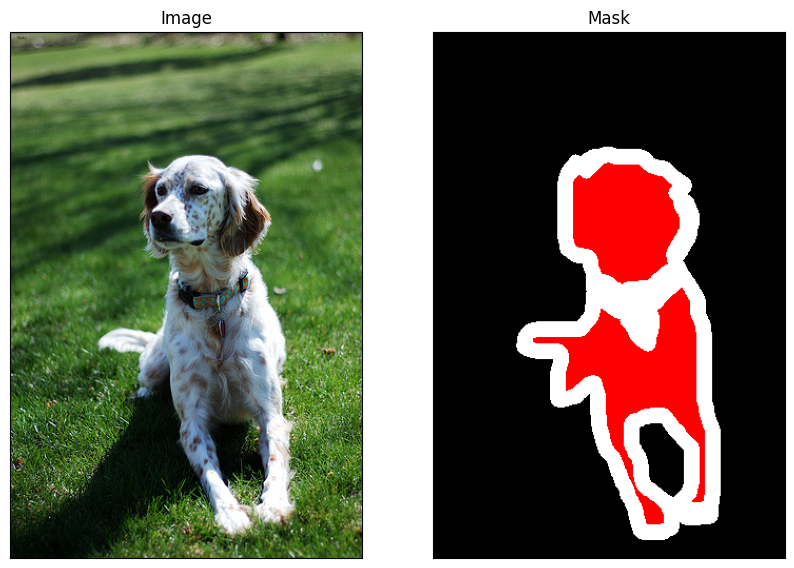

In [233]:
image, mask = test_dataset[2000]
seg.show.visualiseData(image = image, mask = mask)

In [ ]:
import numpy as np

# Suppose you have 3 classes: 0=background, 1=dog, 2=cat
palette = np.array([
    [0,   0,   0],    # class 0 -> black
    [255, 0,   0],    # class 1 -> red
    [0,   255, 0],    # class 2 -> green
], dtype=np.uint8)

def colorize_mask(mask):
    # mask is (H, W) with values in {0,1,2}
    # output is (H, W, 3) color-coded
    return palette[mask]

colorize_mask(mask)

IndexError: index 255 is out of bounds for axis 0 with size 3

### Preprocessing and data augmentations

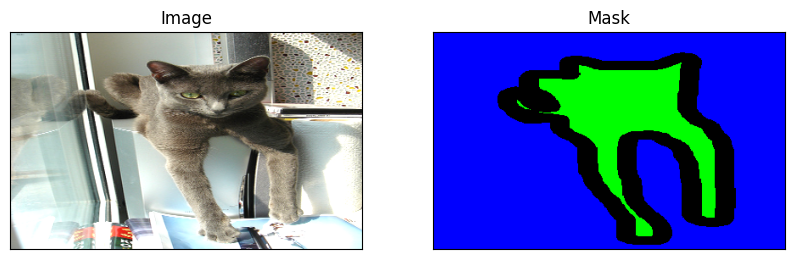

In [142]:
train_augmentation = seg.preprocessing.get_training_augmentation()
augmented_dataset = seg.CVDataset(x_train_fps , y_train_fps, CLASSES, augmentation = train_augmentation)
image, mask = augmented_dataset[100]
seg.show.visualiseData(image=image, mask = mask)

In [143]:
test = {'hi':1, 'hell0':2}

In [146]:
test.values()

dict_values([1, 2])